

```
# This is formatted as code
```

# User Instrctions



1.   Data Uploading is required as it is cleaned up automatically on colab
2.   Incase this needs to be run locally, exclude data upload part and create a dataframe by name from csv
example: df =  pd.read_csv('your local path')





```
# This is formatted as code
```

# Prerequisite: Library installation and Imports


In [ ]:
!pip install Seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split


# Prerequisite: Data Uploading

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data.csv


In [ ]:
path = ''
for key, value in uploaded.items():
  path = key

df =  pd.read_csv(path)

df.head()



,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


# Data Processing

On this step we will be doing bellow steps

*   reviewing columns, data types, null and missing values and process the data.
*   Identifying the features
*   From the bellow analysis there was no missing values and data types were properly identifided by pandas. We did not require convert null values and data types
*   I am consider features 9 grades (Week2_Quiz1, Week3_MP1, ... Week7_MP3). Logs feature do not have much relation and these 9 grades have high relation with overall grade.





In [ ]:
df.describe

<bound method NDFrame.describe of              ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0     ML-2020-1         5.00       15.0        5.0      16.09       5.00   
1     ML-2020-2         3.33       15.0        5.0      17.83       5.00   
2     ML-2020-3         1.67       13.0        5.0      15.22       5.00   
3     ML-2020-4         2.50       14.0        5.0      10.00       5.00   
4     ML-2020-6         0.00       15.0        5.0      12.17       4.93   
..          ...          ...        ...        ...        ...        ...   
102  ML-2020-60         0.00        0.0        0.0       0.00       0.00   
103  ML-2020-58         0.00        0.0        0.0       0.00       0.00   
104  ML-2020-94         0.00        0.0        0.0       0.00       0.00   
105   ML-2020-9         0.00        0.0        0.0       0.00       0.00   
106  ML-2020-86         0.00        0.0        0.0       0.00       0.00   

     Week7_MP3  Week7_PR3  Week4_Quiz2  Week6_Quiz3  

In [ ]:
df.shape

(107, 48)

In [ ]:
df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


In [ ]:
df.columns

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

In [ ]:
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [ ]:
df.dtypes

ID              object
Week2_Quiz1    float64
Week3_MP1      float64
Week3_PR1      float64
Week5_MP2      float64
Week5_PR2      float64
Week7_MP3      float64
Week7_PR3      float64
Week4_Quiz2    float64
Week6_Quiz3    float64
Week8_Total    float64
Week1_Stat0      int64
Week1_Stat1      int64
Week1_Stat2      int64
Week1_Stat3      int64
Week2_Stat0      int64
Week2_Stat1      int64
Week2_Stat2      int64
Week2_Stat3      int64
Week3_Stat0      int64
Week3_Stat1      int64
Week3_Stat2      int64
Week3_Stat3      int64
Week4_Stat0      int64
Week4_Stat1      int64
Week4_Stat2      int64
Week4_Stat3      int64
Week5_Stat0      int64
Week5_Stat1      int64
Week5_Stat2      int64
Week5_Stat3      int64
Week6_Stat0      int64
Week6_Stat1      int64
Week6_Stat2      int64
Week6_Stat3      int64
Week7_Stat0      int64
Week7_Stat1      int64
Week7_Stat2      int64
Week7_Stat3      int64
Week8_Stat0      int64
Week8_Stat1      int64
Week8_Stat2      int64
Week8_Stat3      int64
Week9_Stat0

In [ ]:
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [ ]:
df.corr()['Grade'].sort_values()

Week3_Stat2   -0.162950
Week1_Stat2   -0.129440
Week8_Stat2    0.009186
Week1_Stat3    0.072546
Week5_Stat2    0.073326
Week7_Stat2    0.087466
Week9_Stat3    0.094227
Week9_Stat2    0.147822
Week4_Stat2    0.171987
Week2_Stat3    0.202950
Week3_Stat3    0.227106
Week8_Stat3    0.234907
Week1_Stat0    0.256311
Week5_Stat3    0.264079
Week6_Stat3    0.270239
Week4_Stat3    0.278034
Week6_Stat2    0.288761
Week2_Stat2    0.292262
Week2_Stat0    0.293296
Week7_Stat0    0.377195
Week2_Stat1    0.406120
Week7_Stat1    0.424807
Week7_Stat3    0.439733
Week8_Stat0    0.450807
Week5_Stat1    0.484030
Week9_Stat1    0.496753
Week9_Stat0    0.545532
Week8_Stat1    0.584425
Week5_Stat0    0.590146
Week3_Stat1    0.596824
Week4_Stat0    0.625359
Week6_Stat0    0.635807
Week3_Stat0    0.643789
Week4_Stat1    0.662946
Week2_Quiz1    0.689783
Week6_Stat1    0.771988
Week4_Quiz2    0.810920
Week6_Quiz3    0.849920
Week7_PR3      0.865616
Week3_PR1      0.887352
Week3_MP1      0.901788
Week5_PR2      0

In [ ]:
df.corr()['Week8_Total'].sort_values()

Week3_Stat2   -0.183586
Week1_Stat2   -0.143979
Week8_Stat2    0.010636
Week5_Stat2    0.057208
Week1_Stat3    0.058078
Week9_Stat3    0.083350
Week7_Stat2    0.089620
Week4_Stat2    0.150127
Week9_Stat2    0.152608
Week2_Stat3    0.184819
Week3_Stat3    0.228850
Week1_Stat0    0.233125
Week8_Stat3    0.249535
Week4_Stat3    0.266296
Week5_Stat3    0.271574
Week2_Stat0    0.273022
Week6_Stat2    0.274065
Week6_Stat3    0.284290
Week2_Stat2    0.292687
Week7_Stat0    0.403528
Week2_Stat1    0.423097
Week7_Stat1    0.442955
Week7_Stat3    0.445558
Week8_Stat0    0.484388
Week5_Stat1    0.509709
Week9_Stat1    0.521482
Week9_Stat0    0.559333
Week8_Stat1    0.577887
Week5_Stat0    0.613330
Week3_Stat0    0.637518
Week6_Stat0    0.640015
Week4_Stat0    0.647194
Week3_Stat1    0.660009
Week4_Stat1    0.689466
Week2_Quiz1    0.739192
Week6_Stat1    0.801628
Week7_PR3      0.883680
Week4_Quiz2    0.884461
Week6_Quiz3    0.910623
Week3_PR1      0.952095
Week7_MP3      0.957955
Week5_MP2      0

<Axes: >

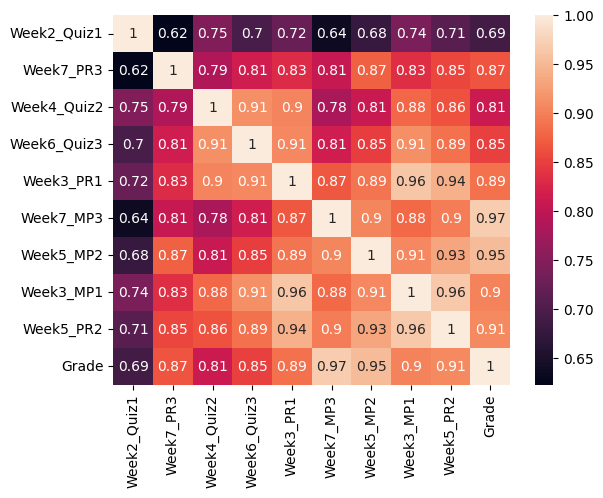

In [ ]:
sns.heatmap(df[['Week2_Quiz1', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week3_PR1', 'Week7_MP3', 'Week5_MP2', 'Week3_MP1', 'Week5_PR2', 'Grade']].corr(), annot=True)

In [ ]:
x  = df.filter(['Week2_Quiz1', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week3_PR1', 'Week7_MP3', 'Week5_MP2', 'Week3_MP1', 'Week5_PR2'])
y = df.filter(['Grade'])
print(x.head())
print(y.head())

   Week2_Quiz1  Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week3_PR1  Week7_MP3  \
0         5.00        5.0         5.00          5.0        5.0      21.88   
1         3.33        5.0         4.00          5.0        5.0      22.27   
2         1.67        2.5         5.00          5.0        5.0      27.05   
3         2.50        5.0         3.13          5.0        5.0      31.02   
4         0.00        5.0         4.67          5.0        5.0      15.91   

   Week5_MP2  Week3_MP1  Week5_PR2  
0      16.09       15.0       5.00  
1      17.83       15.0       5.00  
2      15.22       13.0       5.00  
3      10.00       14.0       5.00  
4      12.17       15.0       4.93  
   Grade
0      4
1      4
2      3
3      3
4      2


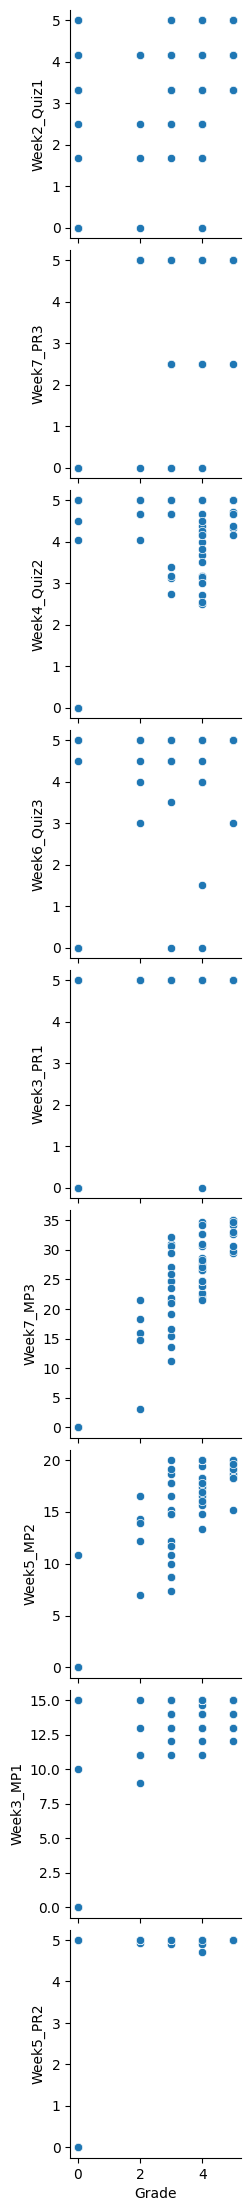

In [ ]:
# plt.figure(figsize=(18,10))
sns.pairplot(df, x_vars=['Grade'], y_vars=['Week2_Quiz1', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week3_PR1', 'Week7_MP3', 'Week5_MP2', 'Week3_MP1', 'Week5_PR2'])

<Axes: xlabel='Grade', ylabel='count'>

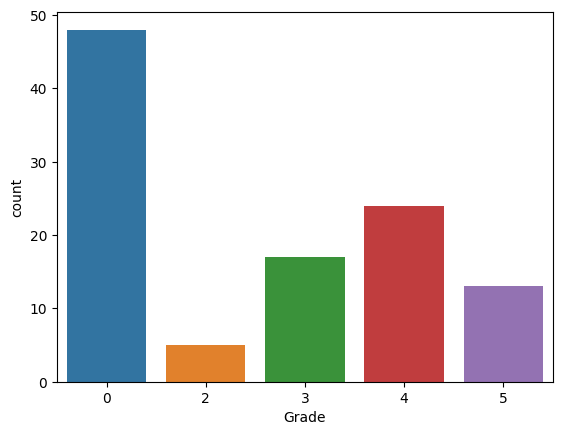

In [ ]:
sns.countplot(x='Grade', data=df)

# Step 2 – Data split: Training and Test sets

On this step we spit data for traning and testing


*   We are considering random 80% for traning data and 20% for test data



In [ ]:
from sklearn.neighbors import NearestCentroid, NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.20,
                                                    random_state=10)
print(X_train)

     Week2_Quiz1  Week7_PR3  Week4_Quiz2  Week6_Quiz3  Week3_PR1  Week7_MP3  \
98          0.00        0.0         0.00          0.0        0.0       0.00   
76          5.00        5.0         4.17          5.0        5.0      28.24   
71          3.33        5.0         4.67          5.0        5.0      35.00   
56          1.67        5.0         4.05          4.5        5.0      21.48   
79          0.00        0.0         0.00          0.0        0.0       0.00   
..           ...        ...          ...          ...        ...        ...   
28          3.33        0.0         5.00          5.0        5.0       0.00   
64          2.50        5.0         5.00          5.0        5.0      21.88   
15          5.00        5.0         5.00          5.0        5.0      29.43   
100         0.00        0.0         0.00          0.0        0.0       0.00   
9           5.00        5.0         4.67          5.0        5.0      24.66   

     Week5_MP2  Week3_MP1  Week5_PR2  
98        0.

# Step 3 – Model Training

On this step we train our models.
I am using three algorithsm for model traning


*   Decession Tree
*   Logictic Regression
*   KNN





In [ ]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

dtc.score(X_test, y_test)

0.8636363636363636

[Text(0.55, 0.9444444444444444, 'x[5] <= 5.57\ngini = 0.702\nsamples = 85\nvalue = [39, 4, 13, 18, 11]'),
 Text(0.48333333333333334, 0.8333333333333334, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0, 0, 0]'),
 Text(0.6166666666666667, 0.8333333333333334, 'x[5] <= 32.415\ngini = 0.702\nsamples = 46\nvalue = [0, 4, 13, 18, 11]'),
 Text(0.43333333333333335, 0.7222222222222222, 'x[5] <= 21.68\ngini = 0.637\nsamples = 35\nvalue = [0, 4, 13, 16, 2]'),
 Text(0.26666666666666666, 0.6111111111111112, 'x[0] <= 3.325\ngini = 0.562\nsamples = 11\nvalue = [0, 4, 6, 1, 0]'),
 Text(0.13333333333333333, 0.5, 'x[2] <= 3.61\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 0, 1, 0]'),
 Text(0.06666666666666667, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(0.2, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.4, 0.5, 'x[3] <= 4.25\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6, 0, 0]'),
 Text(0.3333333333333333, 0.3888888888888889, 'gini = 0.0\nsamp

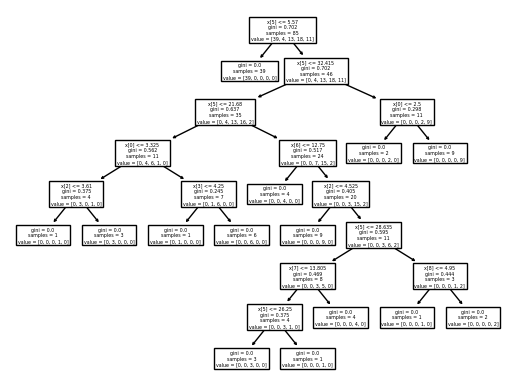

In [ ]:
tree.plot_tree(dtc)

In [ ]:
# lg = LogisticRegression(solver='saga', max_iter=100)
# lg.fit(X_train, y_train)

# print(lg.score(X_test, y_test))

0.7727272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
nca = NeighborhoodComponentsAnalysis(random_state=10)
knn = KNeighborsClassifier(n_neighbors=9)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_fit = nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.8181818181818182


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Out of these two machine learning models decison tree have better performance with test data. On next step we also find that it's accurancy is better than other algoritm KNN.



# Step 4 – Performance Evaluation

On this step we evaluate the models performance report and visualize the report

In [ ]:
dtc_y_pred = dtc.predict(X_test)

print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           2       0.00      0.00      0.00         1
           3       1.00      0.75      0.86         4
           4       0.83      0.83      0.83         6
           5       0.67      1.00      0.80         2

    accuracy                           0.86        22
   macro avg       0.68      0.72      0.69        22
weighted avg       0.84      0.86      0.84        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


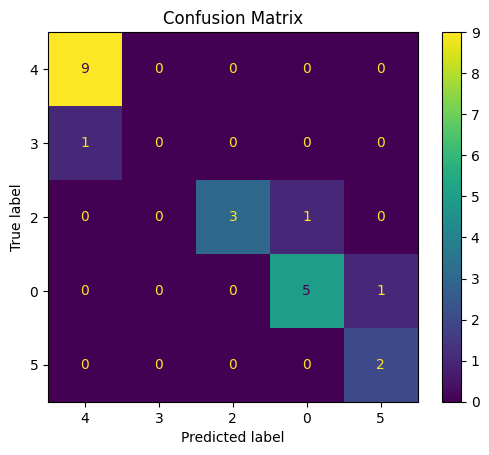

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, dtc_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y['Grade'].unique())
disp.plot()
disp.ax_.set(title='Confusion Matrix')
plt.show()

In [ ]:
nca_y_pred = nca_pipe.predict(X_test)

print(classification_report(y_test, nca_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         4
           4       0.67      0.67      0.67         6
           5       0.50      1.00      0.67         2

    accuracy                           0.82        22
   macro avg       0.83      0.83      0.80        22
weighted avg       0.86      0.82      0.82        22



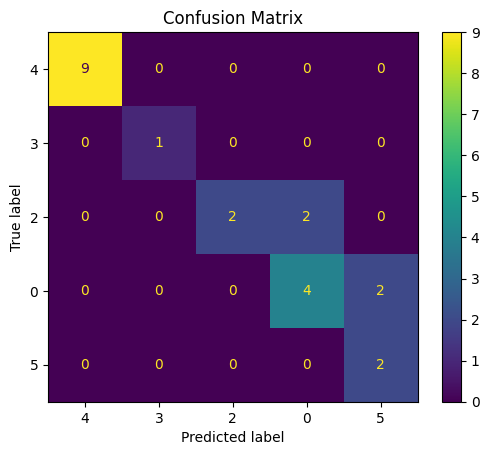

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, nca_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y['Grade'].unique())
disp.plot()
disp.ax_.set(title='Confusion Matrix')
plt.show()

I think we have good accurancy and futher change is not required on model. Further changes can overfit the model that has been developed using decision tree and KNN.

# Important features

On this step , we identify the important features.

Feature: Week2_Quiz1 Score: 0.10454
Feature: Week7_PR3 Score: 0.00000
Feature: Week4_Quiz2 Score: 0.05117
Feature: Week6_Quiz3 Score: 0.02872
Feature: Week3_PR1 Score: 0.00000
Feature: Week7_MP3 Score: 0.68323
Feature: Week5_MP2 Score: 0.07231
Feature: Week3_MP1 Score: 0.03769
Feature: Week5_PR2 Score: 0.02234


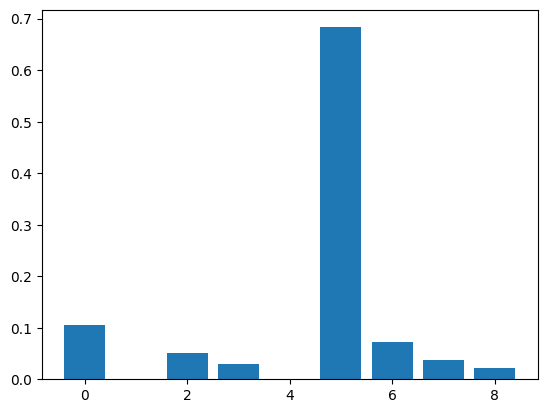

In [ ]:
dtc.feature_importances_

importance = dtc.feature_importances_
for i,v in enumerate(importance):
	print(f'Feature: {dtc.feature_names_in_[i]} Score: %.5f' % (v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
